# 2차원 데이터의 정리

## 두 데이터 사이의 관계를 나타내는 지표

In [ ]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
# 매직함수 사용 % 을 이용함
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)


In [ ]:
!pwd  #현재 주소 확인 리눅스 명령어로 ! 를 이용함

/content


In [ ]:
# 구글 드라이브에서 파일 가져오기
# 드라이브에 마운트 시킴 ('주소')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/파이썬/누구나 파이썬 통계분석/python_stat_sample-master/data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
df[['english','mathematics']].head(10)

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [ ]:
#데이터 프레임에 있는 데이터를 numpy의 array를 이용해 
# english와 mathematics를 각각 10행씩 변수에 담아서 가져옴 
en_scores = np.array(df['english'][0:10])
ma_scores = np.array(df.mathematics.head(10))

scores_df = pd.DataFrame({'english':en_scores, 
                          'mathematics':ma_scores}, 
                         index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                          name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [ ]:

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 共分散

In [ ]:
summary_df = scores_df.copy()

# english와 mathematics의 편차 구하기
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()

# 두 편차를 이용해서 
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [ ]:
# 공분산 값

summary_df['product of deviations'].mean()

62.800

62.800

In [ ]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
# cov_mat[0,0] = english (86) , cov_mat[1,0] = mathematics (62.8)
# cov_mat[0,1] = english (62.8), cov_mat[1,1] = mathematics (68, 44)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
# cov_mat[0,1] = english (62.8), cov_mat[1,0] = mathematics (62.8)
cov_mat[0,1],cov_mat[1,0]

(62.800, 62.800)

(62.800000000000004, 62.800000000000004)

In [ ]:
# cov_mat[0,0] = english (86) , cov_mat[1,1] = mathematics (68, 44)
cov_mat[0,0],cov_mat[1,1]

(86.000, 68.440)

(86.0, 68.44000000000001)

In [ ]:
np.var(en_scores,ddof=0)

86.000

In [ ]:
np.var(ma_scores,ddof=0)

68.440

In [ ]:
np.var(en_scores,ddof=0), np.var(ma_scores,ddof=0)

(86.000, 68.440)

### 상관계수
 -  공분산을 각 데이터의 표준편차로 나눈 값

In [ ]:
np.std(summary_df.english)

9.274

In [ ]:
# 수식으로 계산하는 영어점수와 수학 점수의 상관계수
# cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat[0,1] / (np.std(en_scores)*np.std(ma_scores))

0.819

0.8185692341186713

In [ ]:
# numpy의 corrcoef 함수(상관행렬의 [0,0][1,0] 성분)

np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [ ]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [ ]:
import matplotlib.pyplot as plt

# 매직함수 % 를 이용 
%matplotlib inline

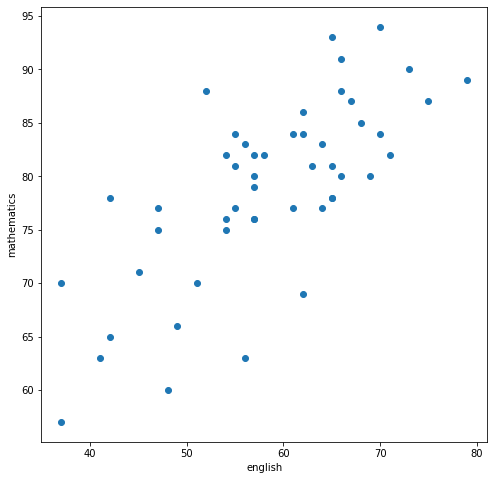

In [ ]:
english_scores = np.array(df.english)  #english_scores = np.array(df['english'])
math_scores = np.array(df.mathematics) #math_scores = np.array(df['mathematics']) 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# # # 산점도 = scatter
ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

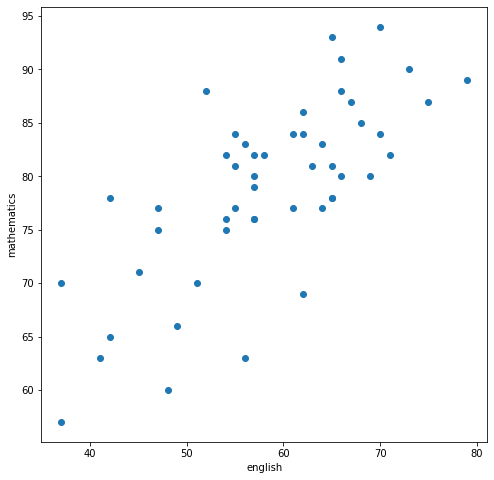


### 회귀직선

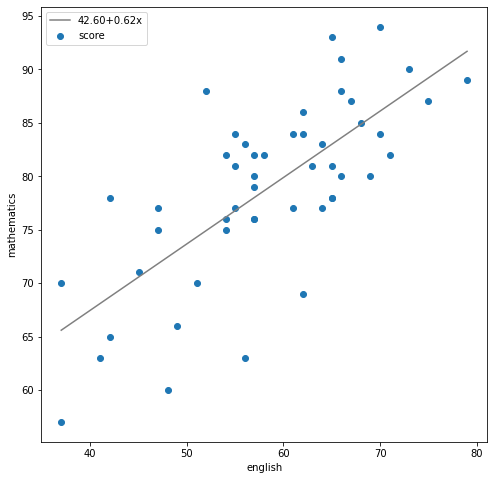

In [ ]:
#y = β0 + β1x
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)

# β_0+β_1 x를 반환하는 함수(y = β0 + β1x)를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())

# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)



# 그래프

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 범례의 표시

ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.legend(loc='upper left')

plt.show()

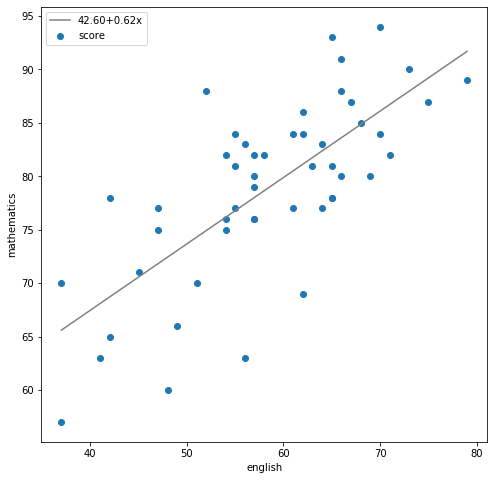

In [ ]:
# 계수β_0와β_1를 구한다

# β_0+β_1 x를 반환하는 함수를 작성

# 직선을 그리기 위해 x좌표를 생성

# xs에 대응하는 y좌표를 구한다


# 범례의 표시


plt.show()

### 히트맵

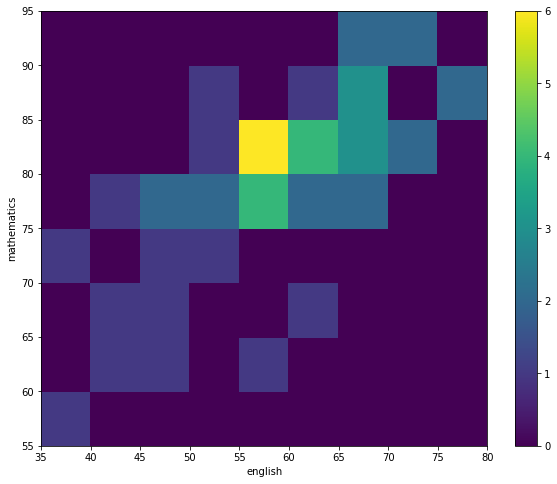

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# # # 히스토그램 = hist

# # # 히트맵 = hist2d
c = ax.hist2d(english_scores, math_scores,
              bins = [9,8], range = [(35, 80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바의 표시
fig.colorbar(c[3], ax = ax)

plt.show()

In [ ]:
c

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 1., 1., 0.],
        [0., 1., 0., 0., 4., 6., 0., 0.],
        [0., 0., 1., 0., 2., 4., 1., 0.],
        [0., 0., 0., 0., 2., 3., 3., 2.],
        [0., 0., 0., 0., 0., 2., 0., 2.],
        [0., 0., 0., 0., 0., 0., 2., 0.]]),
 array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 array([55., 60., 65., 70., 75., 80., 85., 90., 95.]),
 <matplotlib.collections.QuadMesh at 0x7fc6d46ab790>)

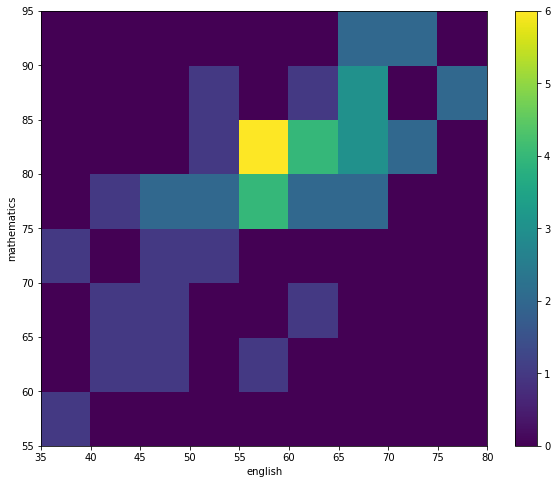

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins = [9,8], range = [(35, 80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 컬러 바의 표시

plt.show()

## 앤스컴의 예

In [ ]:
anscombe_data = np.load('/content/drive/MyDrive/파이썬/누구나 파이썬 통계분석/python_stat_sample-master/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [ ]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('/content/drive/MyDrive/파이썬/누구나 파이썬 통계분석/python_stat_sample-master/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [ ]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i,j in enumerate(anscombe_data):
  dataX = j[:,0]
  dataY = j[:,1]
  poly_fit = np.polyfit(dataX, dataY, 1)
  stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                         f'{np.var(dataX):.2f}',
                         f'{np.mean(dataY):.2f}',
                         f'{np.var(dataY):.2f}',
                         f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
                         f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


In [ ]:

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


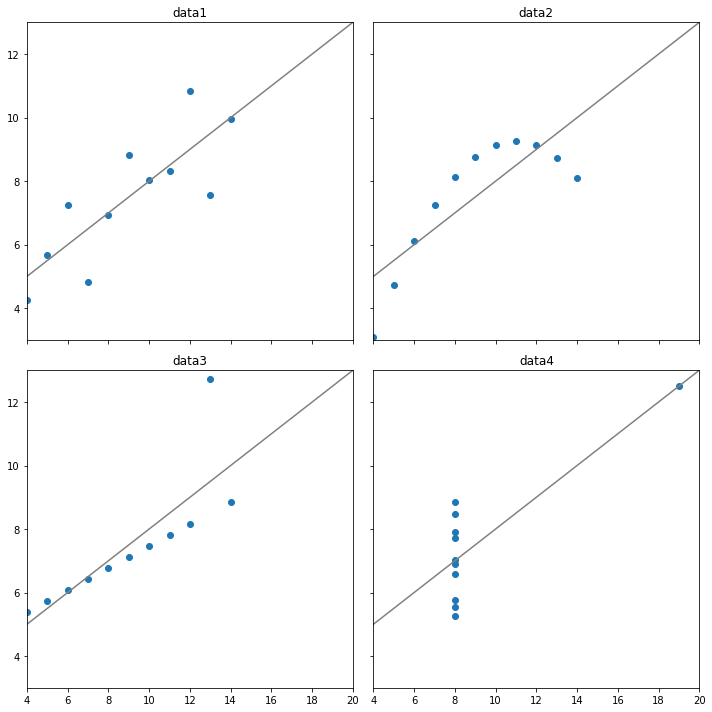

In [ ]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex = True, sharey = True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
  poly_fit = np.polyfit(data[:,0], data[:, 1], 1)
  poly_1d = np.poly1d(poly_fit)
  ys = poly_1d(xs)

  # 그리는 영역을 선택
  ax = axes[i//2, i%2]
  ax.set_xlim([4, 20])
  ax.set_ylim([3, 13])

  # 타이틀을 부여
  ax.set_title(f'data{i+1}')
  ax.scatter(data[:,0], data[:, 1])
  ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()

plt.show()

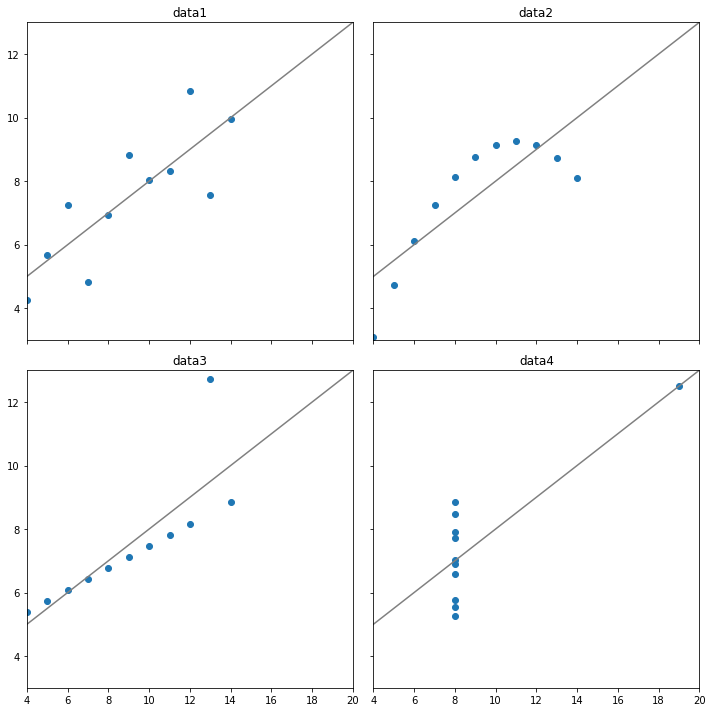

In [ ]:
# 그래프를 그리기 위한 영역을 2x2개 생성

fig = plt.

    # 그리는 영역을 선택

    # 타이틀을 부여

# 그래프 사이의 간격을 좁힘

plt.show()